# **A. Connect to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **B. Build & Train CNN model**

#### **1. Imports / Installs**

In [2]:
pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 59.5MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [3]:
import os

#### **2. Change directory**

In [6]:
if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/CAADRIA_21_Archi_base':
    os.chdir('/content/drive/My Drive/Colab Notebooks/CAADRIA_21_Archi_base')
    print("Directory changed.") 

#### **3. Load data**

In [8]:
import os
labels = os.listdir("Data/2_training_data")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
      print("{}, {} files".format(label, len(os.listdir("Data/2_training_data/"+label))))

No. of labels: 16
-----------------
closeup, 500 files
books, 500 files
interior, 500 files
models, 10 files
people, 500 files
sketches, 500 files
street, 500 files
technical_drawings, 500 files
texture, 500 files
.ipynb_checkpoints, 0 files
aerial, 500 files
building_gaps, 500 files
city_skyline, 500 files
horizon, 500 files
night, 500 files
misc, 250 files


In [9]:
# If any files need to be removed
labels.remove('models')

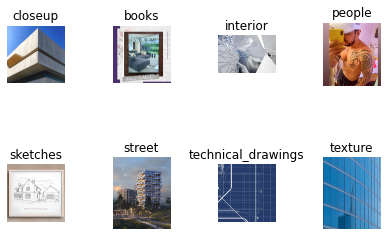

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fig, ax = plt.subplots(nrows=2, ncols=4)
fig.tight_layout()
cnt = 0
for row in ax:
    for col in row:
        image_name = np.random.choice(os.listdir("Data/2_training_data/" + labels[cnt]))
        im = Image.open("Data/2_training_data/{}/{}".format(labels[cnt],image_name))
        col.imshow(im)
        col.set_title(labels[cnt])
        col.axis('off')
        cnt += 1
plt.show()

#### **4. Create model**

In [11]:
from fastai.vision import *
from fastai.metrics import accuracy

In [12]:
path = "./Data/2_training_data/"
size = 224
bs = 64

In [13]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=False),
                                  valid_pct=0.2, size=size, bs=bs)

In [14]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5388 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
closeup,closeup,closeup,closeup,closeup
Path: Data/2_training_data;

Valid: LabelList (1346 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
closeup,technical_drawings,interior,people,aerial
Path: Data/2_training_data;

Test: None

In [15]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


#### **5. Determine model's best learning rate**

In [ ]:
# learner.lr_find()
# learner.recorder.plot()

#### **6. Fit model**

epoch,train_loss,valid_loss,accuracy,time
0,1.726835,0.586245,0.775000,05:36
1,1.039981,0.449370,0.850000,01:12
2,0.724346,0.453010,0.850000,01:13
3,0.567781,0.364011,0.877500,01:12
4,0.489512,0.338935,0.900000,01:12
5,0.437998,0.429096,0.865000,01:18
6,0.398916,0.336567,0.900000,01:14
7,0.354543,0.334244,0.902500,01:17
8,0.313758,0.349423,0.905000,01:13
9,0.276375,0.394757,0.892500,01:13


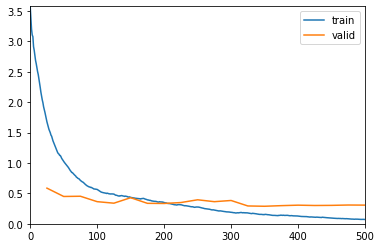

In [ ]:
learner.fit_one_cycle(20, max_lr=slice(1e-4, 1e-2))
# This passes a range of learning rates...meaning train the first layers
# at 1e-3 and the last layers at le-2....the earlier layers dont need
# to train more because they are much simpler...hence a lower learning rate.

#### **7. Save / load model weights (if required)**

In [33]:
if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/CAADRIA_21_Archi_base':
    os.chdir('/content/drive/My Drive/Colab Notebooks/CAADRIA_21_Archi_base')
    print("Directory changed.") 

In [36]:
# learner.save('weights_7')
learner.load('weights_path')

Learner(data=ImageDataBunch;

Train: LabelList (5388 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
closeup,closeup,closeup,closeup,closeup
Path: Data/2_training_data;

Valid: LabelList (1346 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
closeup,technical_drawings,interior,people,aerial
Path: Data/2_training_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

In [37]:
learner.export('pickle_weights_11.17.20.pkl')

#### **8. Model analysis**

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)

In [ ]:
interpreter.most_confused(min_val=2)

[('aerial', 'street', 9),
 ('closeup', 'street', 8),
 ('street', 'closeup', 4),
 ('texture', 'closeup', 4),
 ('closeup', 'texture', 3),
 ('street', 'aerial', 2)]

#### **9. Model results**

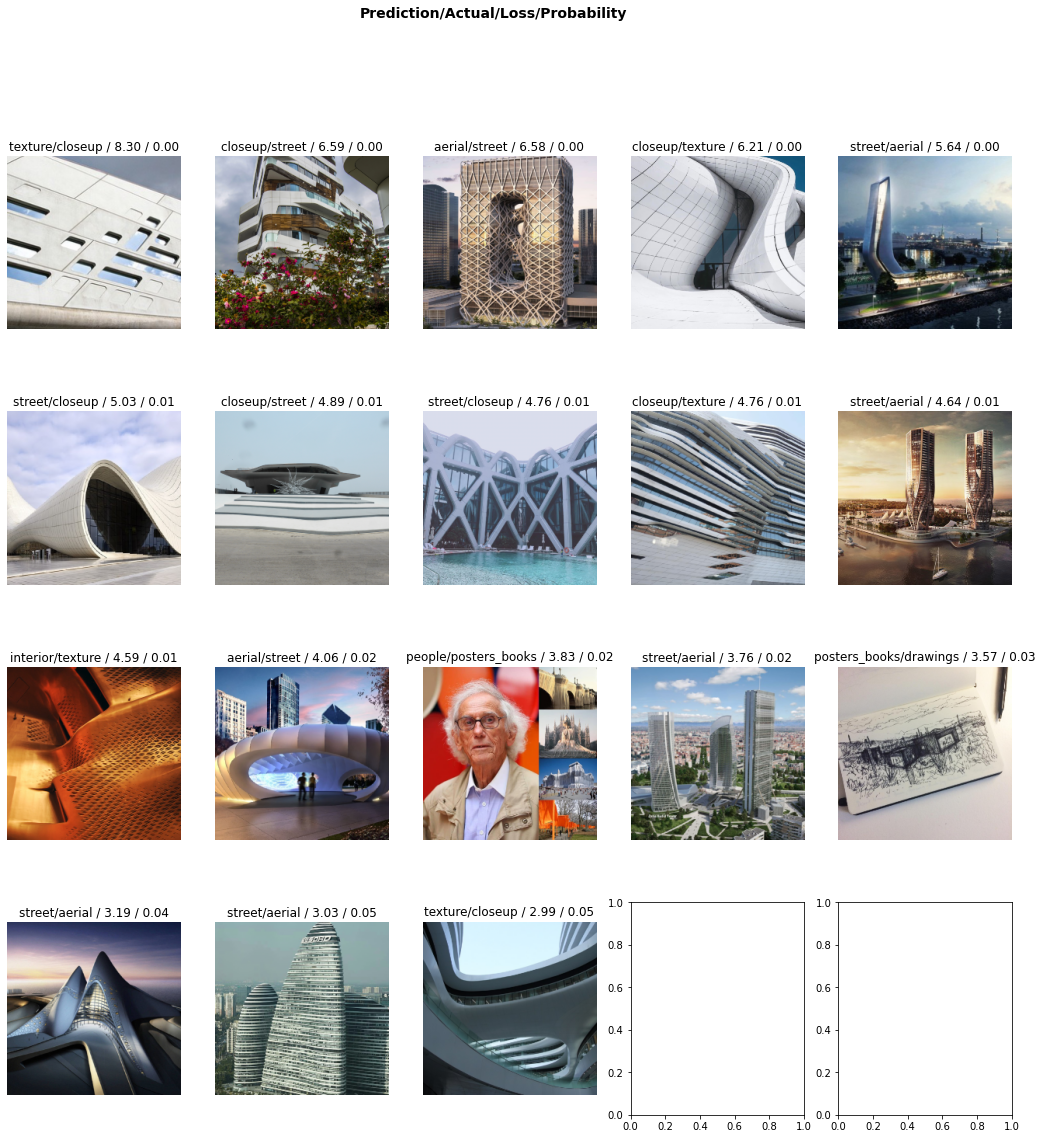

In [ ]:
interpreter.plot_top_losses(18, figsize=(18,18))

# shows predictions with largest loss function (biggest error)

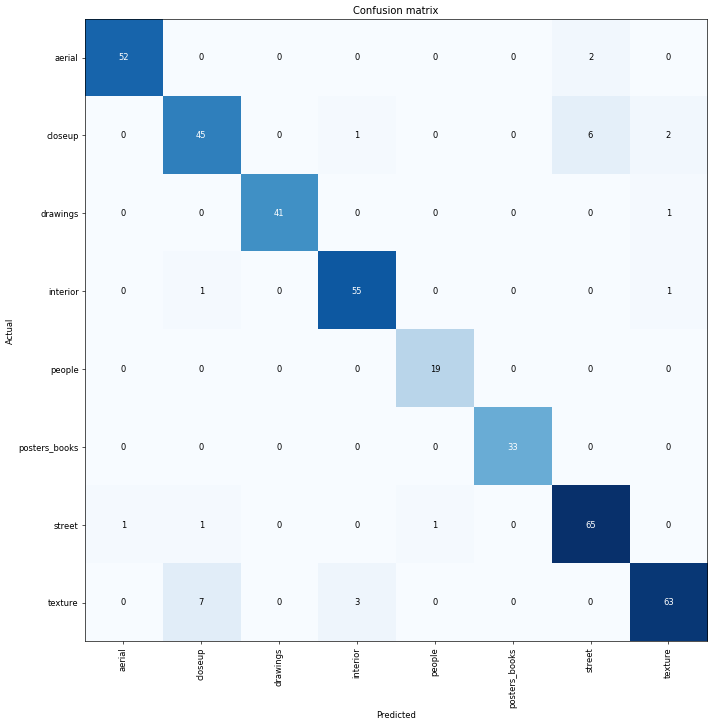

In [ ]:
interpreter.plot_confusion_matrix(figsize=(12,12), dpi=60)

#### **10. MODEL RESULTS - MORE INFO**

In [ ]:
# to understand results, access detailed info from documents

doc(interpreter.plot_top_losses)